In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.shape

(19158, 13)

In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14454,0.910,no_enrollment,Graduate,5.0,55.0
3137,0.698,Full time course,Graduate,4.0,26.0
12319,0.924,no_enrollment,Graduate,14.0,56.0
7104,0.896,no_enrollment,Masters,20.0,110.0
1397,0.920,no_enrollment,Graduate,9.0,86.0


In [11]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [12]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

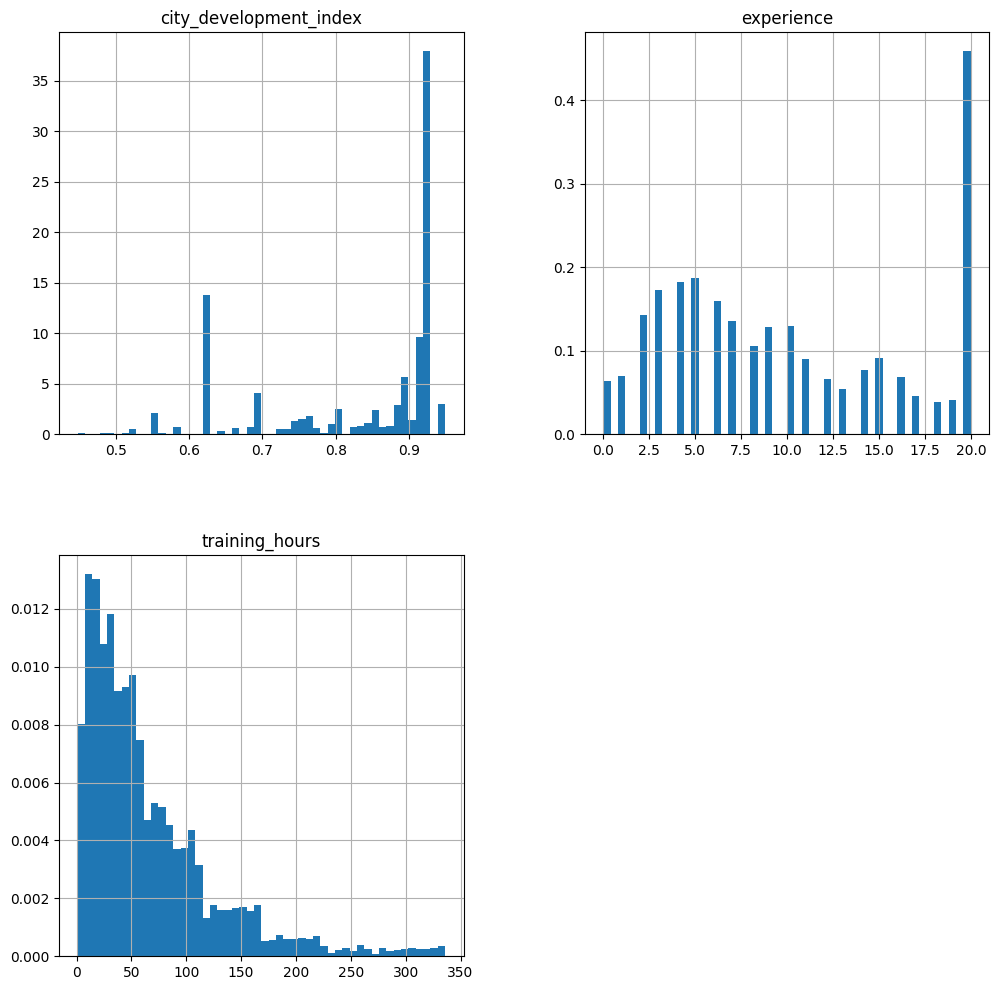

In [13]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

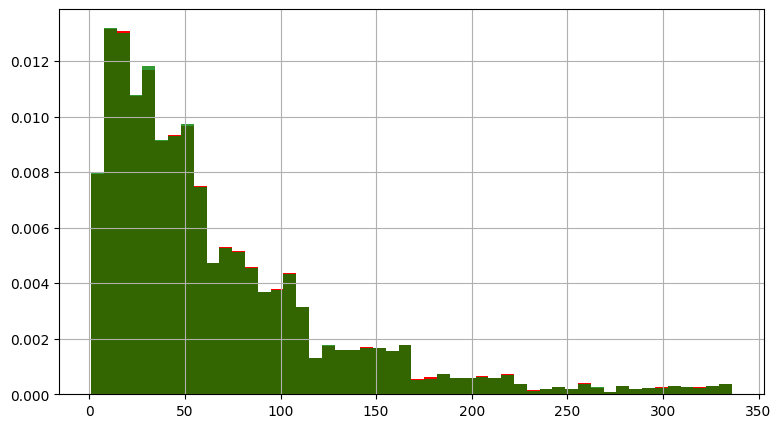

In [19]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)

#original data
df['training_hours'].hist(bins=50, density=True, ax=ax, color='red')

#data after cca, the argument alpha makes the color transparent, so we can 
#see the overlay of the 2 distributions

new_df['training_hours'].hist(bins=50, density=True, ax=ax, color='green', alpha=0.8)
plt.show()

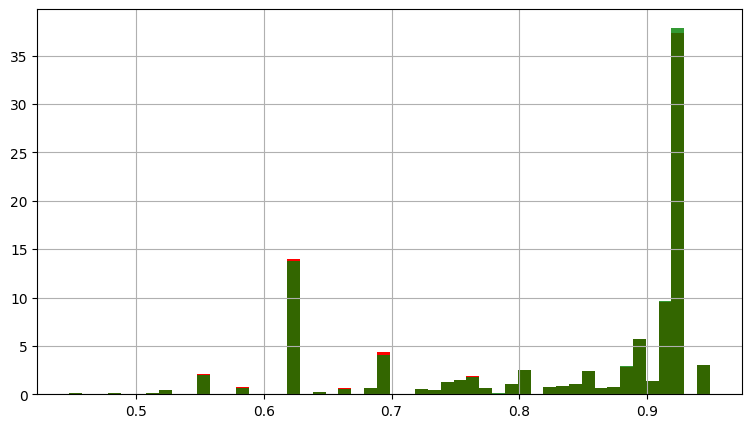

In [20]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)

#original data
df['city_development_index'].hist(bins=50, density=True, ax=ax, color='red')

#data after cca, the argument alpha makes the color transparent, so we can 
#see the overlay of the 2 distributions

new_df['city_development_index'].hist(bins=50, density=True, ax=ax, color='green', alpha=0.8)
plt.show()

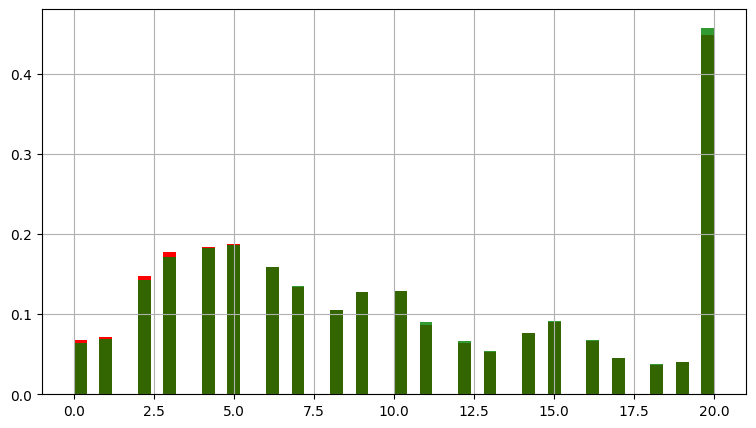

In [21]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)

#original data
df['experience'].hist(bins=50, density=True, ax=ax, color='red')

#data after cca, the argument alpha makes the color transparent, so we can 
#see the overlay of the 2 distributions

new_df['experience'].hist(bins=50, density=True, ax=ax, color='green', alpha=0.8)
plt.show()

In [22]:
temp = pd.concat([
    #ratio of observations per category, original data
    df['enrolled_university'].value_counts()/len(df),

    #ratio of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [23]:
temp = pd.concat([
    #ratio of observations per category, original data
    df['education_level'].value_counts()/len(df),

    #ratio of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
